In [134]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd

In [6]:
os.getcwd()

'/Users/ryan/Downloads/01Foundation/13-web-scraping-beautifulsoup'

In [165]:
with open('Tin Hau_fp.txt','r') as f: #f is the filehandle
    lines  = f.readlines()
    lines = [i.strip() for i in lines]

In [318]:
lines

['https://www.foodpanda.hk/restaurant/v7cw/shu-family-private-kitchen',
 'https://www.foodpanda.hk/restaurant/s0us/small-potato',
 'https://www.foodpanda.hk/restaurant/s7hb/pizza-hut-tung-lo-wan-road',
 'https://www.foodpanda.hk/restaurant/p8xn/phd-percival-street',
 'https://www.foodpanda.hk/restaurant/v5qo/express-bar-by-lassana-causeway-bay',
 'https://www.foodpanda.hk/restaurant/b0kr/hot-dog-link-tin-hau',
 'https://www.foodpanda.hk/restaurant/p8xn/phd-percival-street',
 'https://www.foodpanda.hk/restaurant/v0ls/six-garden-restauant',
 'https://www.foodpanda.hk/restaurant/qugk/the-opera-coffee',
 'https://www.foodpanda.hk/restaurant/w1ou/din-tai-fung-hk-causeway-bay',
 'https://www.foodpanda.hk/restaurant/v1np/simple-viet',
 'https://www.foodpanda.hk/restaurant/k73r/show-boat-gourmet',
 'https://www.foodpanda.hk/restaurant/s6mc/jacky-s-kitchen',
 'https://www.foodpanda.hk/restaurant/w0ru/sheep-and-pig',
 'https://www.foodpanda.hk/restaurant/x0nw/ho-hung-kee-1946-congee-and-noodle-s

In [163]:
lines = lines

In [167]:
resto_page = []
count = 0
for i in lines:
    URL = i
    html = requests.get(URL)
    soup = BeautifulSoup(html.text, "html.parser")

    try:
        name = soup.find("h1").text
    except:
        name = None

    try:
        rating = soup.find("span", class_="rating").text
    except:
        name2 = None

    try:
        comment = soup.find("span", class_="count").text.strip()
    except:
        comment = None

    try:
        promotion = soup.find("div", class_="deal-name").text.strip()
    except:
        promotion = None

    try:
        cuisines_type = soup.find("ul", class_="vendor-info-main-details-cuisines").text.strip()
    except:
        cuisines_type = None

    try:
        price = soup.find_all(class_="price p-price")
        price_list = []
        for i in price:
            price_list.append(float(re.findall(r'\d+\.\d\d',i.text)[0]))
            avg_price = statistics.mean(price_list)
    except:
        avg_price = None
    count+=1
    print(count)

    resto_page.append({"Name" : name,
    "rating" : rating,
    "comment" : comment,
    "promotion" : promotion,
    "cuisines_type" : cuisines_type,
    "avg_price" : avg_price,
    })

df = pd.DataFrame(resto_page)
df.to_csv("resto_tin_hau_fp.csv",mode='w', header=True, index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [36]:
soup

<!DOCTYPE html>

<!--[if lt IE 10]> <html class="ie9"> <![endif]-->
<!--[if !(IE)]><!--> <html class="" lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={licenseKey:"f77b1abc66",applicationID:"52563615"};window.NREUM||(NREUM={}),__nr_require=function(e,t,n){function r(n){if(!t[n]){var i=t[n]={exports:{}};e[n][0].call(i.exports,function(t){var i=e[n][1][t];return r(i||t)},i,i.exports)}return t[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(e,t,n){function r(){}function i(e,t,n){return function(){return o(e,[u.now()].concat(c(arguments)),t?null:this,n),t?void 0:this}}var o=e("handle"),a=e(6),c=e(7),f=e("ee").get("tracer"),u=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var d=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace"

In [37]:
# resto name
soup.find("h1").text

'Small Potato'

In [38]:
# rating 
soup.find("span", class_="rating").text

'3.8/5'

In [39]:
# num of comments
soup.find("span", class_="count").text

'\n            131\n        '

In [40]:
# promotion type
soup.find("div", class_="deal-name").text

'30% off $100'

In [45]:
#get the cuisines_type
soup.find("ul", class_="vendor-info-main-details-cuisines").text

'\n\n$\n$\n$\n\nPasta\nPizza\nWestern\nSalad\nDine-in Price\n'

In [ ]:
//span[starts-with(@class,"price p-price")]

In [112]:
#get the price mean
import re
import statistics
l = soup.find_all(class_="price p-price")
price_list = []
for i in l:
    price_list.append(float(re.findall(r'\d+\.\d\d',i.text)[0]))
#     removed = i.find(class_ = 'price-discount')
#     removed.extract()
#     print(i.text)
#    print('-------------------------')
statistics.mean(price_list)

51.87

In [97]:
s = "        $232 rhj     "
re.findall(r'\d+',s)

['232']

In [65]:
print(l.get_text())

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [137]:
resto_page = []

for resto in soup:
    soup = BeautifulSoup(html.text, 'html.parser')
    try:
        name = soup.find("h1").text
    except:
        name = None

    try:
        rating = soup.find("span", class_="rating").text
    except:
        name2 = None

    try:
        comment = soup.find("span", class_="count").text.strip()
    except:
        comment = None

    try:
        promotion = soup.find("div", class_="deal-name").text.strip()
    except:
        promotion = None

    try:
        cuisines_type = soup.find("ul", class_="vendor-info-main-details-cuisines").text.strip()
    except:
        cuisines_type = None

    try:
        price = soup.find_all(class_="price p-price")
        price_list = []
        for i in price:
            price_list.append(float(re.findall(r'\d+\.\d\d',i.text)[0]))
        avg_price = statistics.mean(price_list)
    except:
        avg_price = None

resto_page.append({"Name" : name,
"rating" : rating,
"comment" : comment,
"promotion" : promotion,
"cuisines_type" : cuisines_type,
"avg_price" : avg_price,
})

df = pd.DataFrame(resto_page)
#df.to_csv("openrice2021.csv",mode='w', header=True, index=False)

In [126]:
avg_price = soup.find_all(class_="price p-price")
price_list = []
for i in avg_price:
    price_list.append(float(re.findall(r'\d+\.\d\d',i.text)[0]))
print(statistics.mean(price_list))

51.87


In [ ]:
resto_page

In [239]:
new_df = pd.DataFrame(df['new'].value_counts())
new_df
df.to_csv("TinHau_fp.csv",mode='w', header=True, index=False)

In [153]:
len(lines)

711

In [251]:
df.to_csv("TinHau_fp.csv",mode='w', header=True, index=False)

In [169]:
df.to_csv("resto_tin_hau_fp.csv",mode='w', header=True, index=False)

In [302]:
df[df.Name.str.contains('88')]

,Name,rating,comment,promotion,cuisines_type,avg_price,new,Exclusivity,keys
595,wagyu 88,4.5/5,71,10% off $80,"[Japanese, Limited Offers, Dine-in Price, Caro...",120.475,"[Japanese, Limited Offers, Dine-in Price, Caro...",other platforms as well,wagyu 88


In [444]:
df['cuisines_type2'] = df['cuisines_type'].apply(lambda x: x[1:2])
merga = merga.drop(columns = 'avg_price')

<ipython-input-444-e63773e044f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisines_type2'] = df['cuisines_type'].apply(lambda x: x[1:2])


In [445]:
merga

,keys,cuisines_type1,cuisines_type2
0,shu family private kitchen,[Noodles],[Chinese]
1,small potato,[Pasta],[Pizza]
2,pizza hut,[American],[Pizza]
3,phd,[Italian],[Pizza]
4,express bar by lassana,[Pasta],[Western]
...,...,...,...
706,cafe du parc,[Western],[Pasta]
707,beef noodles,[Noodles],[Chinese]
708,soul 9+,[European],[Pasta]
709,don moment,[Seafood],[Japanese]


In [229]:
df['new']=df['cuisines_type'].str.split('\n')

In [231]:
#for i in df['new']:
for i in range(len(df['new'])):
    df['new'][i]=df['new'][i][4:]
    print(df['new'][i])

['Noodles', 'Chinese', 'Limited Offers', 'Dine-in Price', 'Carousel Deals']
['Pasta', 'Pizza', 'Western', 'Salad', 'Dine-in Price']
['American', 'Pizza', 'Western']
['Italian', 'Pizza', 'Western', 'Pasta']
['Pasta', 'Western', 'Salad', 'Tea Time']
['German', 'Only on foodpanda', 'Dine-in Price']
['Italian', 'Pizza', 'Western', 'Pasta']
['Hong Kong', 'Tea Time']
['Drinks', 'Western', 'Only on foodpanda', 'Dine-in Price']
['Taiwanese', 'Soup', 'Only on foodpanda', 'Dine-in Price']
['Vietnamese']
['Hong Kong', 'Only on foodpanda', 'Cha Chaan Teng']
['French', 'Only on foodpanda', 'Pasta', 'Dine-in Price']
['Western', 'Japanese', 'Pasta']
['Chinese', 'Tea Time']
['Drinks', 'Western', 'Tea', 'Carousel Deals']
['Hong Kong']
['Japanese']
['Hong Kong', 'Soup', 'Tea Time']
['Seafood', 'Chinese', 'Dine-in Price']
['Chinese', 'Dim Sum', 'Hong Kong', 'Special Prices', 'Favourites by foodpanda']
['Dim Sum', 'Chinese', 'Favourites by foodpanda']
['Japanese', 'Dine-in Price', 'Carousel Deals', 'Favou

<ipython-input-231-060621ec1fd3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new'][i]=df['new'][i][4:]


'\\S\\w*\\S'

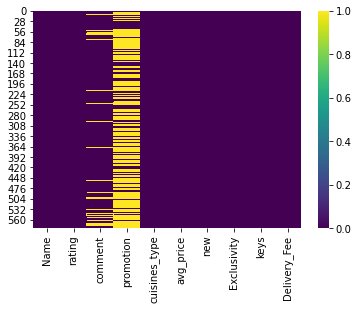

In [400]:
import seaborn as sns
sns.heatmap(result.isnull(),cmap= 'viridis')
(r'\S\w*\S')

In [240]:
df['cuisines_type'] = df['new']

In [248]:
df = df.drop_duplicates('Name')

In [249]:
len(df)

589

In [313]:
df

,Name,rating,comment,promotion,cuisines_type,avg_price,new,Exclusivity,keys
0,shu family private kitchen,4.5/5,227,10% off $80,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",102.444000,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",0,shu family private kitchen
1,small potato,3.8/5,131,30% off $100,"[Pasta, Pizza, Western, Salad, Dine-in Price]",51.870000,"[Pasta, Pizza, Western, Salad, Dine-in Price]",0,small potato
2,pizza hut (tung lo wan road),4.3/5,916,None,"[American, Pizza, Western]",113.022222,"[American, Pizza, Western]",0,pizza hut
3,phd (percival street),4.1/5,114,Free Delivery $200,"[Italian, Pizza, Western, Pasta]",95.687500,"[Italian, Pizza, Western, Pasta]",0,phd
4,express bar by lassana (causeway bay),4.1/5,None,None,"[Pasta, Western, Salad, Tea Time]",54.586207,"[Pasta, Western, Salad, Tea Time]",0,express bar by lassana
...,...,...,...,...,...,...,...,...,...
706,cafe du parc,4.5/5,None,None,"[Western, Pasta, Dine-in Price]",236.809524,"[Western, Pasta, Dine-in Price]",0,cafe du parc
707,beef noodles,4.4/5,412,None,"[Noodles, Chinese, Only on foodpanda]",31.389831,"[Noodles, Chinese, Only on foodpanda]",1,beef noodles
708,soul 9+,3.5/5,7,None,"[European, Pasta]",117.730769,"[European, Pasta]",0,soul 9+
709,don moment,3.5/5,None,None,"[Seafood, Japanese]",202.000000,"[Seafood, Japanese]",0,don moment


In [301]:
df['Exclusivity'] = df.cuisines_type.apply(lambda x: 'Only on foodpanda' if x == 'Only on foodpanda' else "other platforms as well")

<ipython-input-301-2fe1ff57dedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exclusivity'] = df.cuisines_type.apply(lambda x: 'Only on foodpanda' if x == 'Only on foodpanda' else "other platforms as well")


In [312]:
x = ['Noodles', 'Chinese', 'Limited Offers', 'Dine-in Price', 'Carousel Deals']
def exclusivity(x):
    if 'Only on foodpanda' in x:
        return 1
    else:
        return 0
df['Exclusivity'] = df['new'].apply(exclusivity)
exclusivity(x)

<ipython-input-312-a525310e315b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exclusivity'] = df['new'].apply(exclusivity)


0

In [310]:
df.new[0]

['Noodles', 'Chinese', 'Limited Offers', 'Dine-in Price', 'Carousel Deals']

In [295]:
import re
s = 'pizza hut (tung lo wan road)'
#re.findall(r'^($',s)
re.sub("\\(.*", "", s).strip(' ')

'pizza hut'

In [296]:
df['keys'] = df.Name.apply(lambda x: re.sub("\\(.*", "", x).strip(' '))

<ipython-input-296-a4fc358e99b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keys'] = df.Name.apply(lambda x: re.sub("\\(.*", "", x).strip(' '))


In [299]:
df

,Name,rating,comment,promotion,cuisines_type,avg_price,new,Exclusivity,keys
0,shu family private kitchen,4.5/5,227,10% off $80,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",102.444000,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",other platforms as well,shu family private kitchen
1,small potato,3.8/5,131,30% off $100,"[Pasta, Pizza, Western, Salad, Dine-in Price]",51.870000,"[Pasta, Pizza, Western, Salad, Dine-in Price]",other platforms as well,small potato
2,pizza hut (tung lo wan road),4.3/5,916,None,"[American, Pizza, Western]",113.022222,"[American, Pizza, Western]",other platforms as well,pizza hut
3,phd (percival street),4.1/5,114,Free Delivery $200,"[Italian, Pizza, Western, Pasta]",95.687500,"[Italian, Pizza, Western, Pasta]",other platforms as well,phd
4,express bar by lassana (causeway bay),4.1/5,None,None,"[Pasta, Western, Salad, Tea Time]",54.586207,"[Pasta, Western, Salad, Tea Time]",other platforms as well,express bar by lassana
...,...,...,...,...,...,...,...,...,...
706,cafe du parc,4.5/5,None,None,"[Western, Pasta, Dine-in Price]",236.809524,"[Western, Pasta, Dine-in Price]",other platforms as well,cafe du parc
707,beef noodles,4.4/5,412,None,"[Noodles, Chinese, Only on foodpanda]",31.389831,"[Noodles, Chinese, Only on foodpanda]",other platforms as well,beef noodles
708,soul 9+,3.5/5,7,None,"[European, Pasta]",117.730769,"[European, Pasta]",other platforms as well,soul 9+
709,don moment,3.5/5,None,None,"[Seafood, Japanese]",202.000000,"[Seafood, Japanese]",other platforms as well,don moment


In [416]:
type = ["Chinese","Japanese","Western","Hong Kong","Malaysian","Taiwanese","Itallian","American","Indonesian","Drinks","Mexican","Salad","Korean","Fast Food","Middle Eastern","Dim Sum","Pizza","German","Vietnamese", "French","Pasta","Burger","Vegertarian","Thai"]
type

['Chinese',
 'Japanese',
 'Western',
 'Hong Kong',
 'Malaysian',
 'Taiwanese',
 'Itallian',
 'American',
 'Indonesian',
 'Drinks',
 'Mexican',
 'Salad',
 'Korean',
 'Fast Food',
 'Middle Eastern',
 'Dim Sum',
 'Pizza',
 'German',
 'Vietnamese',
 'French',
 'Pasta',
 'Burger',
 'Vegertarian',
 'Thai']

In [330]:
with open('figcaption.txt','r') as f: #f is the filehandle
    figcap  = f.readlines()
    figcap = [i.strip() for i in figcap]

In [356]:
figcap

['Ming Ming Cart Noodle Bar (North Point)',
 '4.3/5 (1k+)',
 '$',
 '$',
 '$',
 'hong kongnoodlesonly on foodpanda',
 'HK$ 17 delivery fee',
 'Shu Family Private Kitchen',
 '4.5/5 (232)',
 '$',
 '$',
 '$',
 'chinesenoodlesdine-in pricelimited offers',
 'HK$ 12 delivery fee',
 'Small Potato',
 '3.8/5 (133)',
 '$',
 '$',
 '$',
 'westernpastapizzadine-in price',
 'HK$ 20 delivery fee',
 'Pizza Hut (Tung Lo Wan Road)',
 '4.3/5 (923)',
 '$',
 '$',
 '$',
 'westernpizzaamericanpasta',
 'HK$ 20 delivery fee',
 'PHD (Percival Street)',
 '4.1/5 (118)',
 '$',
 '$',
 '$',
 'italianpizzawesternpasta',
 'Free delivery',
 'PHD (Percival Street)',
 '4.1/5 (118)',
 '$',
 '$',
 '$',
 'italianpizzawesternpasta',
 'Free delivery',
 'Six Garden Restauant',
 '4.1/5 (58)',
 '$',
 '$',
 '$',
 'hong kongtea time',
 'HK$ 2 delivery fee',
 'Ho Hung Kee (1946) Congee & Noodle Shop',
 '4.3/5 (140)',
 '$',
 '$',
 '$',
 'chinesetea time',
 'Free delivery',
 "Jacky's Kitchen",
 '$',
 '$',
 '$',
 'frenchonly on foodpan

In [387]:
figcap[0+7+7+7+7+7+7+7+7], figcap[6+7+7+7+7+7+7+7+7]

("Jacky's Kitchen", 'Sheep and Pig')

In [ ]:
for i in range(len(resto_name)):
  #      k = resto_name[i].text
   #     v = delivery_fee[i].text
    #    name_dfee[k]=v

In [371]:
# name_fee = {}
# kcounter=0
# vcounter=6
# for i in range(len(figcap)+1):
#     k = figcap[kcounter]
#     v = figcap[vcounter]
#     kcounter += 7
#     vcounter += 7
#     name_fee[k] = v
# name_fee
for i in range(0,4905,7):
    k = figcap[i]
    v = figcap[i+6] 
    print(k)

Ming Ming Cart Noodle Bar (North Point)
Shu Family Private Kitchen
Small Potato
Pizza Hut (Tung Lo Wan Road)
PHD (Percival Street)
PHD (Percival Street)
Six Garden Restauant
Ho Hung Kee (1946) Congee & Noodle Shop
Jacky's Kitchen
4.6/5 (72)
4.2/5 (18)
4.3/5 (8)
4.4/5 (109)
4.6/5 (2k+)
$
$
$
$
$
$
$
$
$
$
4.1/5 (78)
4.2/5 (363)
4.4/5 (1k+)
4.2/5 (305)
4.1/5 (111)
4.5/5 (2k+)
5/5 (1)
4.1/5 (225)
4.4/5 (474)
4.4/5 (1k+)
4.2/5 (223)
4.6/5 (224)
4.3/5 (402)
4.2/5 (410)
4.4/5 (1k+)
4/5 (804)
4.6/5 (2k+)
4.2/5 (305)
3.8/5 (472)
4.5/5 (232)
4.4/5 (277)
4.3/5 (533)
4.2/5 (463)
4.6/5 (53)
4.6/5 (161)
4.5/5 (896)
4.4/5 (1k+)
4.1/5 (33)
3/5 (10)
3/5 (2)
$
$
$
$
$
$
$
$
$
$
$
$
westernpizzaburgerpasta
westernamericanonly on foodpanda
HK$ 2 delivery fee
HK$ 20 delivery fee
HK$ 20 delivery fee
HK$ 12 delivery fee
Yaki Oni
4/5 (804)
3.8/5 (171)
4.2/5 (339)
Shu Family Private Kitchen
Chillers (North Point)
Easyfood (Tin Hau)
Ying Lok Restaurant
Tak Cheong Noodle (North Point)
NO.13 Modern Japanese Cuis

IndexError: list index out of range

In [353]:
len(figcap)

4904

In [388]:
s = '4.4/5 (109)'
print([i for i in figcap if i ])

['Ming Ming Cart Noodle Bar (North Point)', '4.3/5 (1k+)', '$', '$', '$', 'hong kongnoodlesonly on foodpanda', 'HK$ 17 delivery fee', 'Shu Family Private Kitchen', '4.5/5 (232)', '$', '$', '$', 'chinesenoodlesdine-in pricelimited offers', 'HK$ 12 delivery fee', 'Small Potato', '3.8/5 (133)', '$', '$', '$', 'westernpastapizzadine-in price', 'HK$ 20 delivery fee', 'Pizza Hut (Tung Lo Wan Road)', '4.3/5 (923)', '$', '$', '$', 'westernpizzaamericanpasta', 'HK$ 20 delivery fee', 'PHD (Percival Street)', '4.1/5 (118)', '$', '$', '$', 'italianpizzawesternpasta', 'Free delivery', 'PHD (Percival Street)', '4.1/5 (118)', '$', '$', '$', 'italianpizzawesternpasta', 'Free delivery', 'Six Garden Restauant', '4.1/5 (58)', '$', '$', '$', 'hong kongtea time', 'HK$ 2 delivery fee', 'Ho Hung Kee (1946) Congee & Noodle Shop', '4.3/5 (140)', '$', '$', '$', 'chinesetea time', 'Free delivery', "Jacky's Kitchen", '$', '$', '$', 'frenchonly on foodpandadine-in price', 'HK$ 2 delivery fee', 'Sheep and Pig', '4.

In [390]:
fee = pd.read_csv('deliveryfee.csv')
fee

,Name,Delivery_Fee
0,Ming Ming Cart Noodle Bar (North Point),HK$ 17 delivery fee
1,Shu Family Private Kitchen,HK$ 12 delivery fee
2,Small Potato,HK$ 20 delivery fee
3,Pizza Hut (Tung Lo Wan Road),HK$ 20 delivery fee
4,PHD (Percival Street),Free delivery
...,...,...
587,Mr.Tree (Causeway Bay),HK$ 20 delivery fee
588,RB Restaurant,HK$ 20 delivery fee
589,Sushi Yorokobu,HK$ 20 delivery fee
590,Mini Melts (Causeway Bay),HK$ 25 delivery fee


In [391]:
df

,Name,rating,comment,promotion,cuisines_type,avg_price,new,Exclusivity,keys
0,shu family private kitchen,4.5/5,227,10% off $80,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",102.444000,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",0,shu family private kitchen
1,small potato,3.8/5,131,30% off $100,"[Pasta, Pizza, Western, Salad, Dine-in Price]",51.870000,"[Pasta, Pizza, Western, Salad, Dine-in Price]",0,small potato
2,pizza hut (tung lo wan road),4.3/5,916,None,"[American, Pizza, Western]",113.022222,"[American, Pizza, Western]",0,pizza hut
3,phd (percival street),4.1/5,114,Free Delivery $200,"[Italian, Pizza, Western, Pasta]",95.687500,"[Italian, Pizza, Western, Pasta]",0,phd
4,express bar by lassana (causeway bay),4.1/5,None,None,"[Pasta, Western, Salad, Tea Time]",54.586207,"[Pasta, Western, Salad, Tea Time]",0,express bar by lassana
...,...,...,...,...,...,...,...,...,...
706,cafe du parc,4.5/5,None,None,"[Western, Pasta, Dine-in Price]",236.809524,"[Western, Pasta, Dine-in Price]",0,cafe du parc
707,beef noodles,4.4/5,412,None,"[Noodles, Chinese, Only on foodpanda]",31.389831,"[Noodles, Chinese, Only on foodpanda]",1,beef noodles
708,soul 9+,3.5/5,7,None,"[European, Pasta]",117.730769,"[European, Pasta]",0,soul 9+
709,don moment,3.5/5,None,None,"[Seafood, Japanese]",202.000000,"[Seafood, Japanese]",0,don moment


In [398]:
result = pd.merge(df, fee, on='Name')


In [409]:
result.to_csv("df_deliver_fee.csv",mode='w', header=True, index=False)

In [408]:
result

,Name,rating,comment,promotion,cuisines_type,avg_price,Exclusivity,keys,Delivery_Fee
0,shu family private kitchen,4.5/5,227,10% off $80,"[Noodles, Chinese, Limited Offers, Dine-in Pri...",102.444000,0,shu family private kitchen,HK$ 12 delivery fee
1,small potato,3.8/5,131,30% off $100,"[Pasta, Pizza, Western, Salad, Dine-in Price]",51.870000,0,small potato,HK$ 20 delivery fee
2,pizza hut (tung lo wan road),4.3/5,916,None,"[American, Pizza, Western]",113.022222,0,pizza hut,HK$ 20 delivery fee
3,phd (percival street),4.1/5,114,Free Delivery $200,"[Italian, Pizza, Western, Pasta]",95.687500,0,phd,Free delivery
4,express bar by lassana (causeway bay),4.1/5,None,None,"[Pasta, Western, Salad, Tea Time]",54.586207,0,express bar by lassana,HK$ 2 delivery fee
...,...,...,...,...,...,...,...,...,...
578,cafe du parc,4.5/5,None,None,"[Western, Pasta, Dine-in Price]",236.809524,0,cafe du parc,HK$ 17 delivery fee
579,beef noodles,4.4/5,412,None,"[Noodles, Chinese, Only on foodpanda]",31.389831,1,beef noodles,HK$ 20 delivery fee
580,soul 9+,3.5/5,7,None,"[European, Pasta]",117.730769,0,soul 9+,HK$ 20 delivery fee
581,don moment,3.5/5,None,None,"[Seafood, Japanese]",202.000000,0,don moment,HK$ 20 delivery fee


In [407]:
result = result.drop(columns = 'new')

In [413]:
l = ['4.3/5','4/5']
s = '4/5'
re.findall(r'(\d.+|\d)[\/]',s)

['4']

In [415]:
df.rating = df.rating.str.extract(r'(\d.+|\d)[\/]')

/Users/ryan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [446]:
merga.to_csv("c_type.csv",mode='w', header=True, index=False)